# Homework 7: Equations of state and the temperature-density plane

In [1]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import astropy.constants as const

## 1. Different Formulas for Pressure

In [2]:
rho = np.logspace(-9, 9, 1000) * u.g / u.cm ** 3
mu = 0.85
mue = 1.5
a = 4 * const.sigma_sb / const.c
C1 = (3 / np.pi) ** (2 / 3) * const.h ** 2 / (20 * const.m_e * const.u ** (5 / 3))
C2 = (3 / np.pi) ** (1 / 3) * const.h * const.c / (8 * const.u ** (4 / 3))

Radiation Pressure

$$P_R=\frac{aT^4}{3}$$

Ideal Gas Pressure

$$P_I=\frac{\rho k_B T}{\mu m_h}$$

Non-Relativistic Electron Degeneracy Pressure

$$P_{e,\text{NR}} = \left(\frac{3}{\pi}\right)^{2/3}\frac{h^2}{20m_em_u^{5/3}}\left(\frac{\rho}{\mu_e}\right)^{5/3}$$

Relativistic Electron Degeneracy Pressure

$$P_{e,\text{R}} = \left(\frac{3}{\pi}\right)^{1/3}\frac{hc}{8m_u^{4/3}}\left(\frac{\rho}{\mu_e}\right)^{4/3}$$

# 2. Areas of preponderance in the log T - log ρ plane

Equating the Radiation Pressure with the Ideal Gas Pressure, we find

$$T=\left(\frac{3k_B}{\mu m_ha}\rho\right)^{1/3}$$

In [3]:
T_I = ((3 * const.k_B / (mu * const.u * a) * rho) ** (1 / 3)).decompose()

Equating the Ideal Gas Pressure with the Nonrelativistic Degeneracy Pressure

$$T=\frac{\mu m_h}{k_B}\left(\frac{3}{\pi}\right)^{2/3}\frac{h^2}{20m_e(m_u\mu_e)^{5/3}}\rho^{2/3}$$

In [4]:
T_deg1 = ((mu * const.u / (const.k_B * rho))
          * C1 * (rho / mue) ** (5 / 3)).decompose()

Equating the Ideal Gas Pressure with the Relativistic Degeneracy Pressure

$$T=\frac{\mu m_h}{k_B}\left(\frac{3}{\pi}\right)^{1/3}\frac{hc}{8(m_u\mu_e)^{4/3}}\rho^{1/3}$$

In [5]:
T_deg2 = ((mu * const.u / (const.k_B * rho))
          * C2 * (rho / mue) ** (4 / 3)).decompose()

Now we can generate our plot to show the various regions at which certain pressures dominate.

In [6]:
# Calculate at which rho relativity kicks in for degeneracy pressure
rho_deg = ((C2 / C1) ** 3 * mue).to(u.g / u.cm ** 3)

# Combine non-rel. and rel. into a single list of degeneracy pressures
T_deg = np.concatenate((T_deg1[rho < rho_deg].value,
                        T_deg2[rho > rho_deg].value)) * u.K

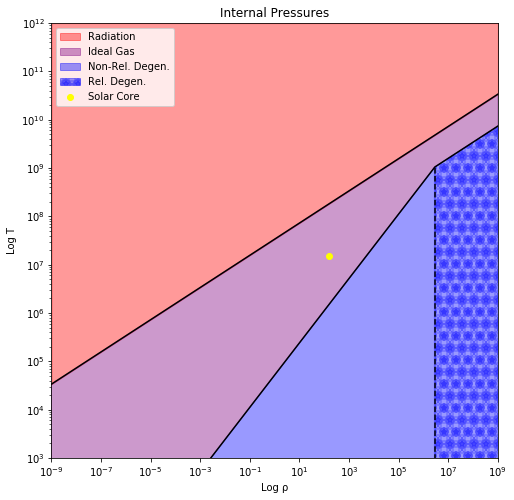

In [7]:
# Create figure
plt.figure(figsize=(8,8))

# Plot the equipressure lines
plt.loglog(rho, T_I, 'k')
plt.loglog(rho, T_deg, 'k')

# Mark the critical density for relativistic effects in degeneracy pressure
plt.vlines(rho_deg.value, 0, 1.0534035 * 10 ** 9, 'k', linestyles='dashed')

# Fill in the regions
plt.fill_between(rho, T_I, 10 ** 12, color='red', alpha=0.4,
                label='Radiation')
plt.fill_between(rho, T_I, T_deg, color='purple', alpha=0.4,
                 label='Ideal Gas')
plt.fill_between(rho, T_deg, where=rho < rho_deg, color='b', alpha=0.4,
                 label='Non-Rel. Degen.')
plt.fill_between(rho, T_deg, where=rho > rho_deg, color='b',
                 alpha=0.4, hatch='/\\|-+x*.oO', label='Rel. Degen.')

# Plot the core of the sun
plt.scatter(150, 15 * 10 ** 6, c='yellow', label='Solar Core')

# Labelling and whatnot
plt.title('Internal Pressures')
plt.ylabel('Log T')
plt.xlabel('Log ρ')
plt.xlim(10 ** -9, 10 ** 9)
plt.ylim(10 ** 3, 10 ** 12)
plt.legend()

plt.show()

Thus we see that the solar core is dominated by Ideal Gas Pressure.